In [1]:
import sys
sys.path.append('..')

from src.loader import InsuranceCrossSellingDataset
from src.analyse import InsuranceDataProcessor
from src.featureEngineering import FeatureEngineering
from src.visualization import Visualization
from src.model_runner import ModelRunner
from sklearn.model_selection import train_test_split


In [2]:
data_loader = InsuranceCrossSellingDataset(data_dir='../data')
train_df, test_df, submission_df = data_loader.load_data()

Téléchargement des données avec l'API Kaggle...
Les fichiers de données existent déjà, pas de téléchargement.
Données téléchargées et chargées avec succès.


In [3]:
ft = FeatureEngineering()

In [4]:
# Encode Binary and Ordinal features
encoded_cols = ['Gender', 'Vehicle_Age', 'Vehicle_Damage']
train_df[encoded_cols] = ft.ordinalEncoding(train_df[encoded_cols])

#Encode Categorical 
encoded_cols = ['Region_Code', 'Policy_Sales_Channel', 'Vintage']
train_df[encoded_cols] = ft.categoricalEncoding(train_df[encoded_cols])

In [5]:
X = train_df.drop(columns=['Response','id'])
y = train_df['Response']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [6]:
X_train_scaled = ft.normalize_feature(X_train, X_train.columns,True)
X_test_scaled = ft.normalize_feature(X_test, X_test.columns, False)

In [7]:
runner = ModelRunner()
model_names, score, report = runner.run(X_train_scaled, X_test_scaled, y_train, y_test)


 Training Logistic Regression...

 Training Decision Tree...

 Training Gaussian Naive Bayes...

Gaussian Naive Bayes - Evaluating

 Training Gaussian Naive Bayes... Done

Logistic Regression - Evaluating

 Training Logistic Regression... Done

Decision Tree - Evaluating

 Training Decision Tree... Done


In [8]:
precision = []
recall = []
for row in range(len(report)):
    precision.append(report[row]['weighted avg']['precision'])
    recall.append(report[row]['weighted avg']['recall'])

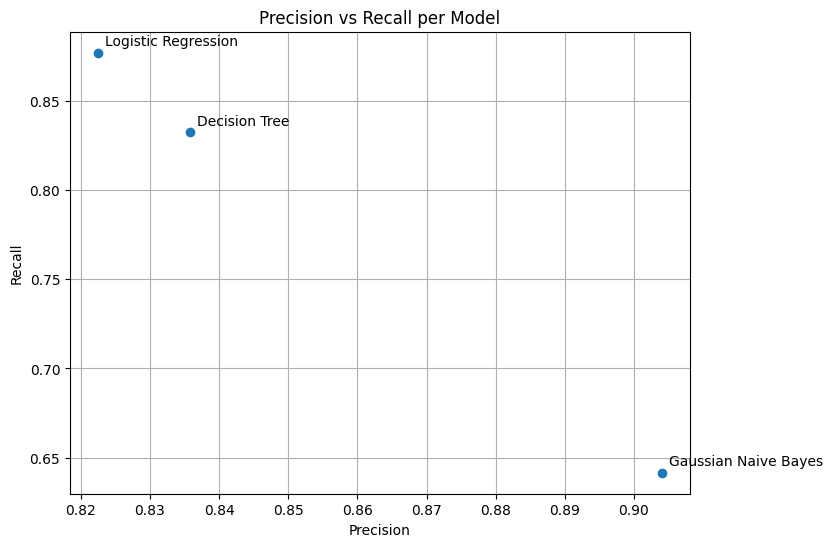

In [9]:
visu = Visualization()

visu.model_performance_plot(model_names, precision, recall)